In [2]:
# Importing important libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading file.
main=pd.read_csv(r"C:\Users\91997\OneDrive\Desktop\oasis1.txt")
d=pd.read_csv(r"C:\Users\91997\OneDrive\Desktop\oasis1.txt")
pd.set_option('display.max_columns',None)

In [4]:
d.shape

(205, 26)

In [5]:
d

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
# columns be dropped => car_ID, CarName
d.drop(columns=['car_ID','CarName'],inplace=True)

In [7]:
# createing a list for categorical columns.
cat=[i for i in d.select_dtypes('object').columns]

In [8]:
# creating a list for numerical columns.
num=[i for i in d.select_dtypes(np.number).columns]

In [58]:
print('Unique values in categorical column: \n\n',d[cat].nunique().sort_values(),sep='')

Unique values in categorical column: 

fueltype          2
aspiration        2
doornumber        2
enginelocation    2
drivewheel        3
carbody           5
symboling         6
enginetype        7
cylindernumber    7
fuelsystem        8
dtype: int64


In [61]:
print('Unique values in numerical column: \n\n',d[num].nunique().sort_values(),sep='') # symboling is a category.

Unique values in numerical column: 

peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
curbweight          171
price               189
dtype: int64


In [11]:
cat.append('symboling')
num.remove('symboling')

In [12]:
d[num[:-1]].describe().T.sort_values('mean') # lets apply scaling first.

,count,mean,std,min,25%,50%,75%,max
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
citympg,205.0,25.219512,6.542142,13.00,19.00,24.00,30.00,49.00
highwaympg,205.0,30.751220,6.886443,16.00,25.00,30.00,34.00,54.00
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00


In [13]:
d.groupby('fuelsystem')['price'].median().sort_values()

fuelsystem
1bbl     7295.0
2bbl     7372.0
spdi     9959.0
spfi    11048.0
4bbl    11845.0
mfi     12964.0
idi     13852.5
mpfi    15991.5
Name: price, dtype: float64

In [14]:
for i in d.select_dtypes('object'):
    print(d[i].value_counts())
    print()

gas       185
diesel     20
Name: fueltype, dtype: int64

std      168
turbo     37
Name: aspiration, dtype: int64

four    115
two      90
Name: doornumber, dtype: int64

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

front    202
rear       3
Name: enginelocation, dtype: int64

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64



# Univariate And Bivariate Analysis ~ Numerical Column

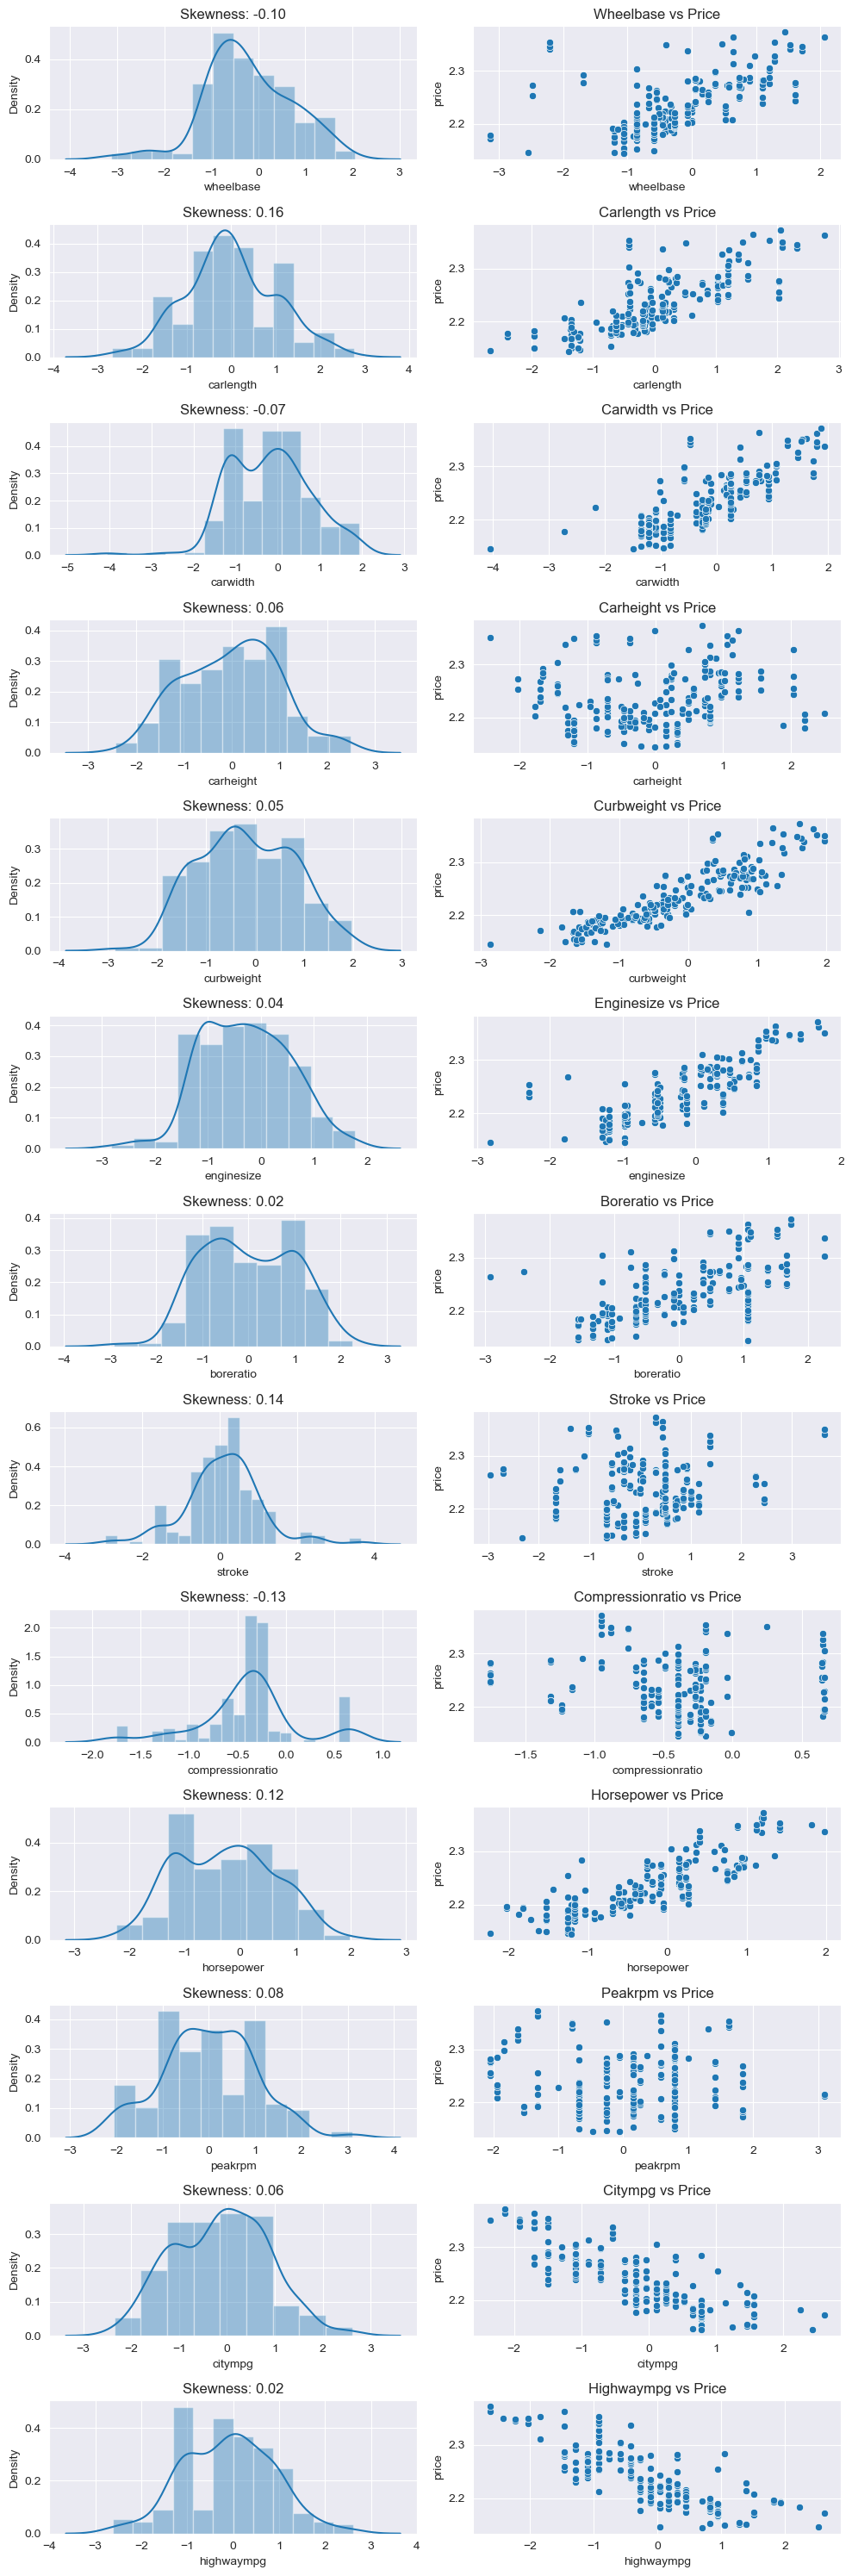

In [66]:
# Let's see the distribution of numerical columns.
trans=[]
plt.figure(figsize=(10,30))
ii=1
for i in num[:-1]:
    plt.subplot(13,2,ii)
    sns.distplot(d[i])
    plt.title('Skewness: %.2f'%(d[i].skew()))
    plt.subplot(13,2,ii+1)
    sns.scatterplot(d[i],d.price)
    plt.title(f'{i.title()} vs Price')
    ii+=2
    if d[i].skew()>0.5 or d[i].skew()<-0.5:
        trans.append(i)
plt.tight_layout()
plt.show()

In [16]:
# Columns to be transformed latter.
d[trans].skew().sort_values()

stroke             -0.689705
highwaympg          0.539997
citympg             0.663704
curbweight          0.681398
carwidth            0.904003
wheelbase           1.050214
horsepower          1.405310
enginesize          1.947655
compressionratio    2.610862
dtype: float64

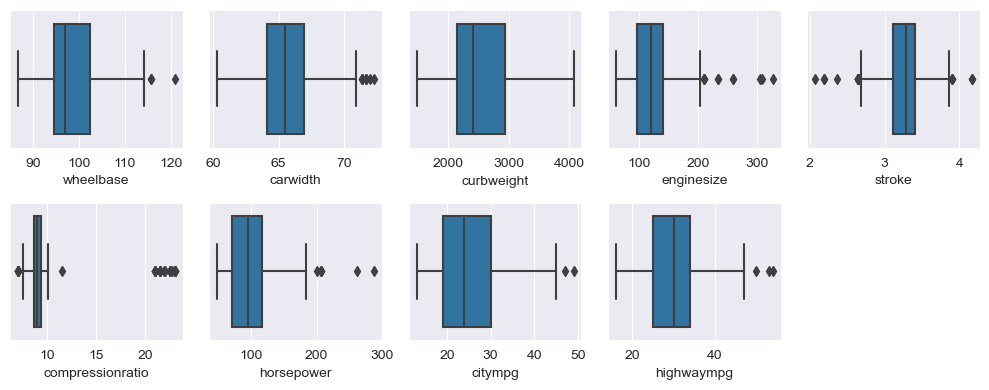

In [17]:
# Visual representaion of outliers.
plt.figure(figsize=(10,4))
ii=1
for i in trans:
    plt.subplot((len(trans))//5+1,5,ii)
    sns.boxplot(d[i])
    ii+=1
plt.tight_layout()
plt.show()

# Univariate And Bivariate Analysis ~ Categorical Columns

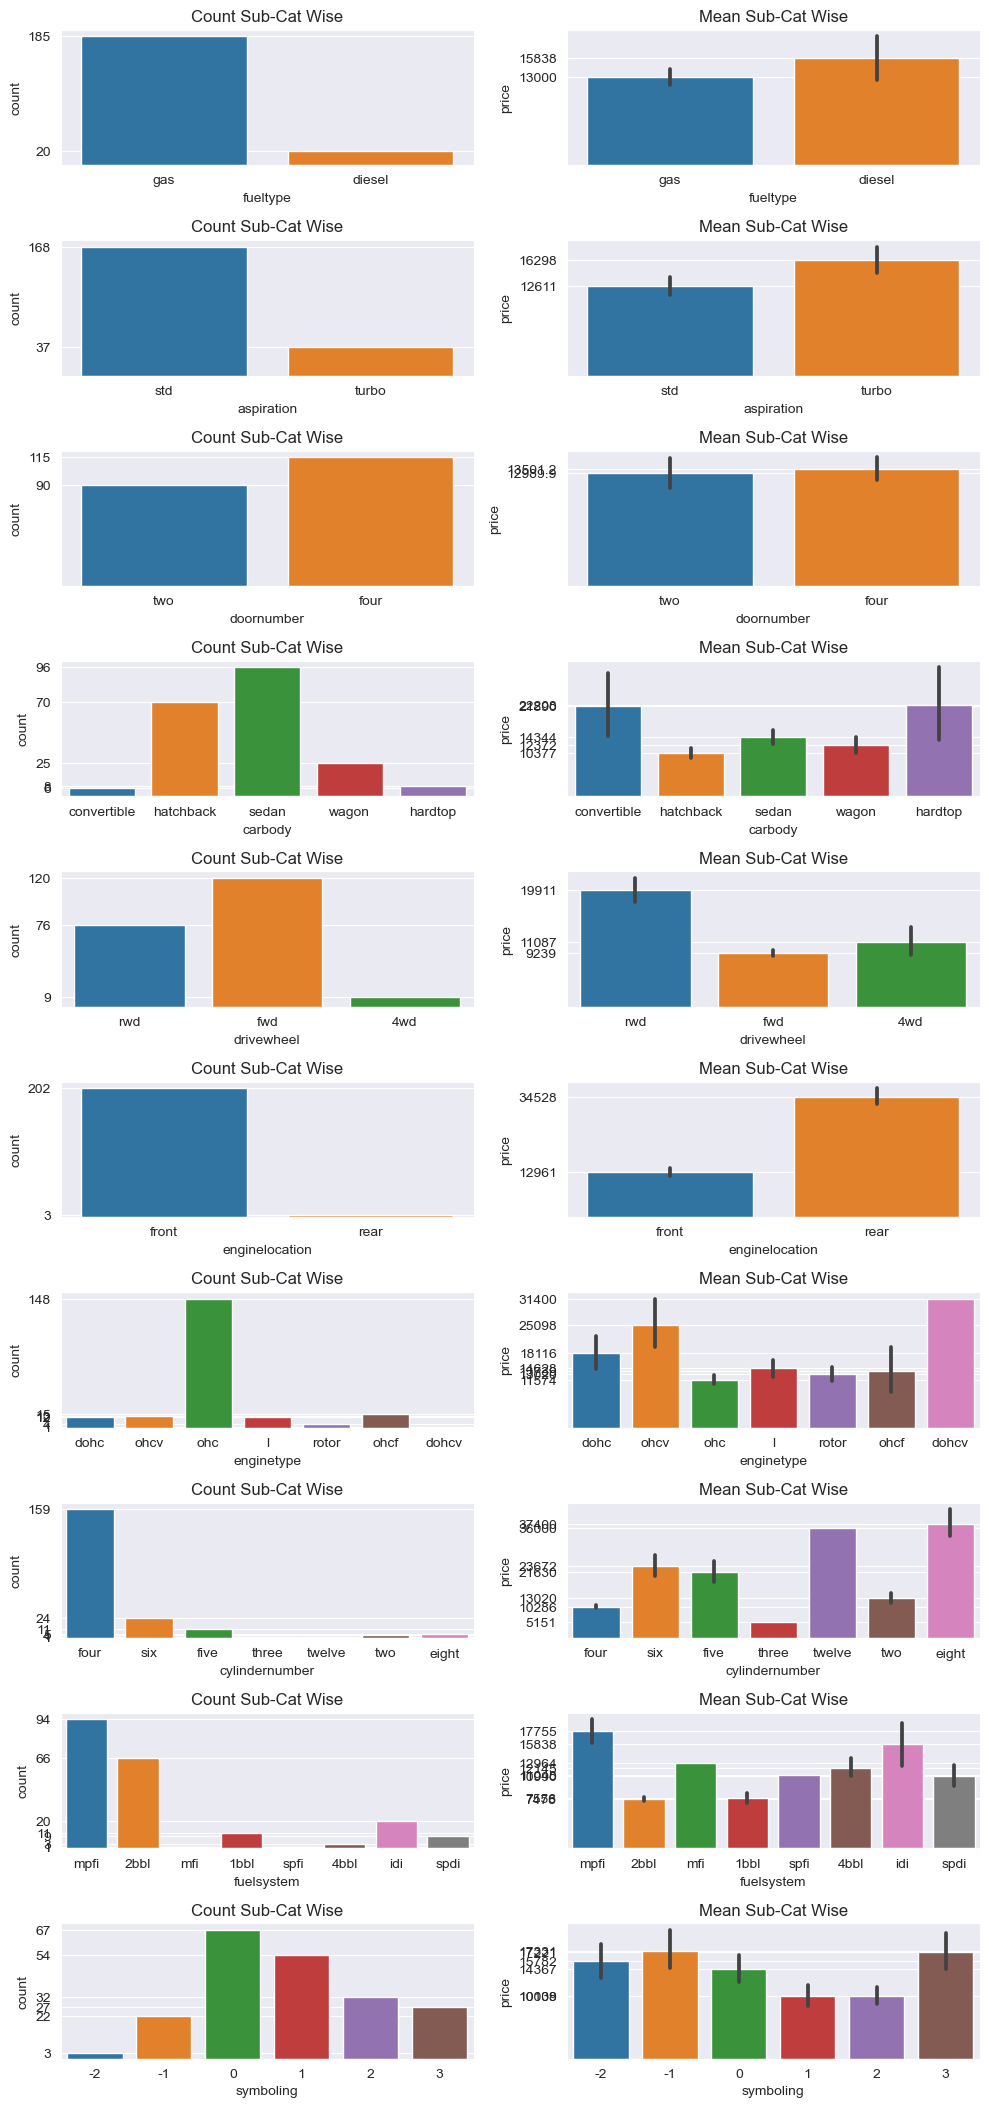

In [18]:
plt.figure(figsize=(10,25))
ii=1
for i in cat:
    plt.subplot(12,2,ii)
    plt.title('Count Sub-Cat Wise')
    plt.yticks(d[i].value_counts())
    sns.countplot(d[i])
    ii+=1
    plt.subplot(12,2,ii)
    plt.title('Mean Sub-Cat Wise')
    sns.barplot(x=d[i],y=d.price)
    plt.yticks(d.groupby(i)['price'].mean())
    ii+=1
plt.tight_layout()
plt.show()

### Observation

* Jaguar & buick seems to have the highest price range cars.
* Car companies like Nisaan,Renault & Mercury are having only one to two datapoints.
* So we can't make any inference related to lowest price range car companies.
* We can clearly make an inisght that Cars having gas fuel system is mostly sold.
* From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
* Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
* From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.
* So we can say that customers prefer those cars which consumes less price in fuels.
* Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
* Cars having Turbo Aspiration have higher price range than the STD Aspiration.
* Cars having Four Doors are mostly sold when compared with cars having Two Doors.
* Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.
* Cars having sedan body-type are mostly sold followed by hatchback.
* Cars having convertible or hardtop body-type are less sold.
* Cars having Hardtop body-type is the mostly expensive cars followed by convertible.
* Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
* Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.
* Most of the cars are having engine location in front.

### Insights

* Note there are only 3 data-points for the rear category.
* So we can't make any inference of car price when compared with engine location.
* If we want we can drop this feature before training as it may lead to overfitting.
* We can make an insight that the high rated cars must be using Rear Wheel Drive.
* Cars with low prices must be using Forward Wheel Drive
* Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
* Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.
* Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors.
* Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors
* Door numbers category is not affecting the price that much.
* Since there are too many categories in car compnay feature. So we can derive a new feature Company Price Range which will show the price range as Low Range, Medium Range, High Range.
* Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.
* Cars having Overhead Camshaft (OHC) engines are mostly sold.
* Only one car has been sold having engine type dohcv.
* There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.
* Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.
* Most of the cars are having Four cyclinders followed by cars having six cyclinders.
* There are only one data-point each for car having Three & Twelve data-points.
* Cars having eight cyclinders are most expensive cars followed by six cyclinders.
* Most of the cars are having mpfi & 2bbl fuelsystems.
* Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
* There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

# Scaling, Transformation and Encoding.

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
import scipy.stats as stats

## Scaling

In [20]:
for i in num[:-1]:
    d[i]=sc.fit_transform(d[[i]])
d[num]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,13495.0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,16500.0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,16500.0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,13950.0
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,16845.0
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,19045.0
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,21485.0
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,22470.0


## Transformation

In [21]:
# Let's see the working of yeojhonson transformation over the columns
x=pd.DataFrame()
for i in trans:
    x[i]=stats.yeojohnson(d[i])[0]
x.skew()[(x.skew()>0.5)|(x.skew()<-0.5)]

Series([], dtype: float64)

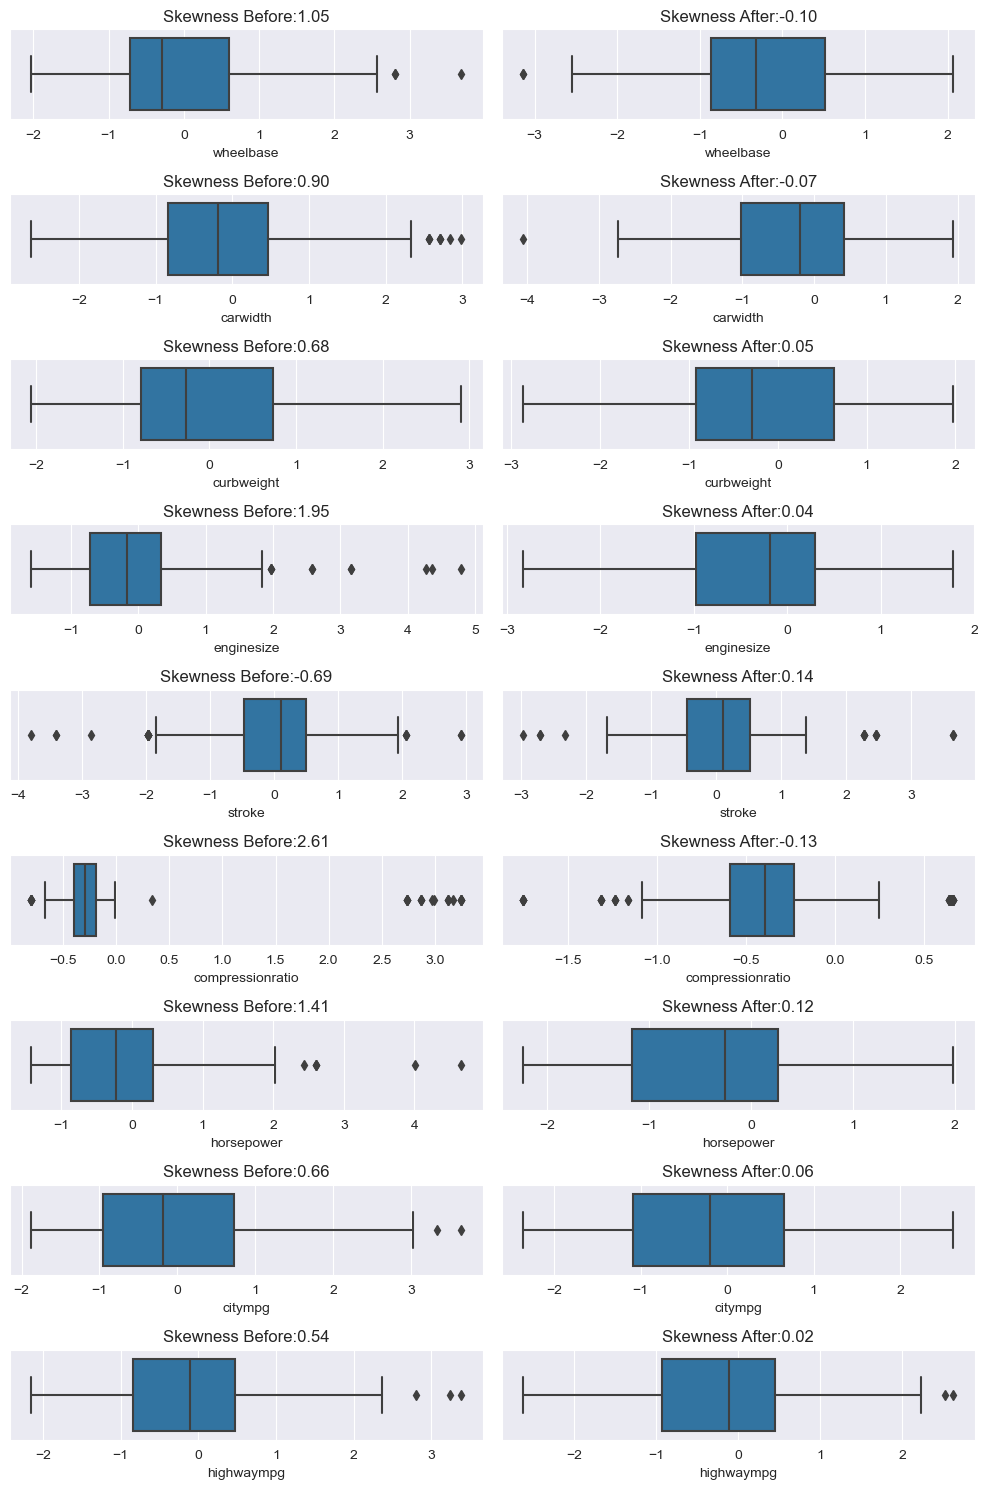

In [22]:
# Visual Representations before and after application of Transformation technique.
plt.figure(figsize=(10,15))
ii=1
for i in trans:
    plt.subplot(9,2,ii)
    sns.boxplot(d[i])
    plt.title('Skewness Before:%.2f'%d[i].skew())
    ii+=1
    plt.subplot(9,2,ii)
    d[i]=stats.yeojohnson(d[i])[0]
    plt.title('Skewness After:%.2f'%d[i].skew())
    sns.boxplot(d[i])
    ii+=1
plt.tight_layout()
plt.show()

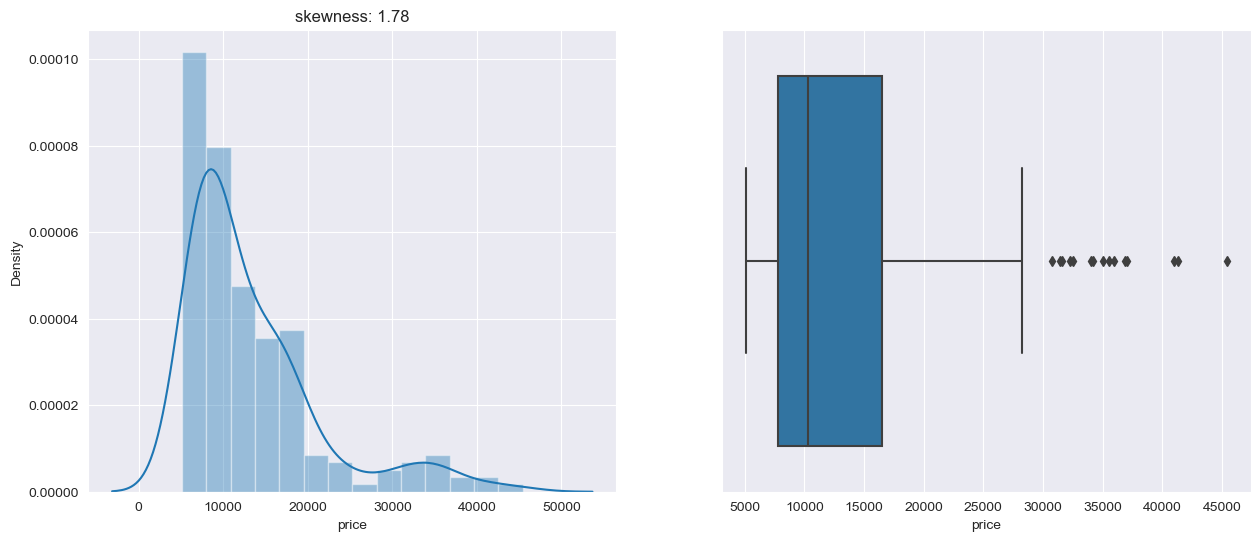

In [23]:
# Lets check the distribution of tgt var => price
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(d.price)
plt.title('skewness: %.2f'%d.price.skew())

plt.subplot(1,2,2)
sns.boxplot(d.price)
plt.show()

In [24]:
round(d.price.describe().to_frame(),2).T

,count,mean,std,min,25%,50%,75%,max
price,205.0,13276.71,7988.85,5118.0,7788.0,10295.0,16503.0,45400.0


### Insights

* We can clearly observe that our Car Price Feature is Right Skewed.
* We can clearly observe that there is a significant difference between mean & median value.
* We can also make an insight that most of the car's price is below 14000.
* We can also that the skewness of the car price is above 1.5 which means that the data points are highly spread.

In [25]:
print('Old Skewness:',round(d.price.skew(),3))
print('New Skewness:',round(np.log(np.log(d.price)).skew(),3))

Old Skewness: 1.778
New Skewness: 0.569


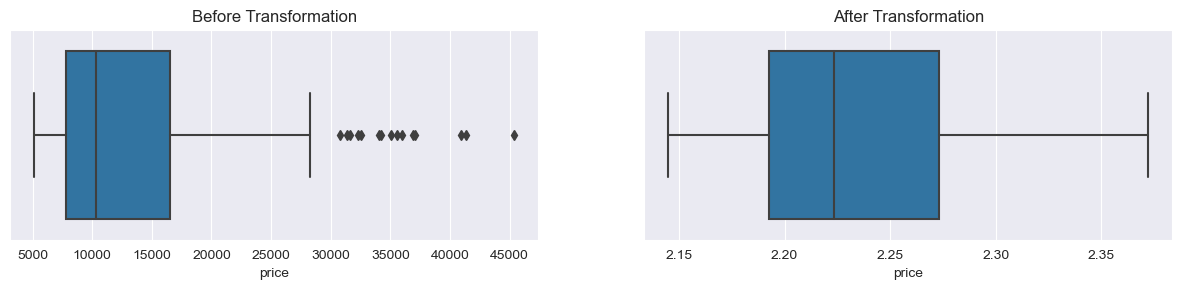

In [26]:
# Visualization of presence of outliers in TGT var before and after Transformation. 
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.boxplot(d.price)
plt.title('Before Transformation')
plt.subplot(2,2,2)
sns.boxplot(np.log(np.log(d.price)))    # dual Log transformation.
plt.title('After Transformation')
plt.show()

In [27]:
# Transforming the TGT variable.
d['price']=np.log(np.log(d.price))

# Encoding

In [28]:
d[cat].nunique().sort_values()  

fueltype          2
aspiration        2
doornumber        2
enginelocation    2
drivewheel        3
carbody           5
symboling         6
enginetype        7
cylindernumber    7
fuelsystem        8
dtype: int64

In [29]:
d.select_dtypes('object')

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [30]:
d['fueltype']=d.fueltype.map({'gas':0,'diesel':1})
d['aspiration']=d.aspiration.map({'std':0,'turbo':1})
d['doornumber']=d.doornumber.map({'two':0,'four':1})
d['drivewheel']=d.drivewheel.map({'fwd':0,'4wd':1,'rwd':2})
d['enginelocation']=d.enginelocation.map({'front':0,'rear':1})
d['carbody']=d.carbody.map({'hatchback':0,'wagon':1,'sedan':2,'convertible':3,'hardtop':4})
d['symboling']=d.symboling.map({1:0,2:1,0:2,-2:3,3:4,-1:5})
d['enginetype']=d.enginetype.map({'ohc':0,'rotor':1,'ohcf':2,'l':3,'dohc':4,'ohcv':5,'dohcv':6})
d['fuelsystem']=d.fuelsystem.map({'2bbl':0,'1bbl':1,'spdi':2,'spfi':3,'4bbl':4,'mfi':5,'idi':6,'mpfi':7})
d['cylindernumber']=d.cylindernumber.map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})

# Modeling

In [31]:
from statsmodels.api import OLS, add_constant
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
lr=LinearRegression()
rd=Ridge()
ls=Lasso()
en=ElasticNet()
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X=d.drop(columns='price')
y=d.price

In [33]:
base_model=OLS(y,X).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1181.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):                   4.53e-185
Time:                        21:51:21   Log-Likelihood:                          57.988
No. Observations:                 205   AIC:                                     -69.98
Df Residuals:                     182   BIC:                                      6.453
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0476      0.010      4.799      0.000       0.028       0.067
fueltype             0.1210      0.128      0.948      0.345      -0.131       0.373
aspiration           0.1356      0.069      1.970      0.050      -0.000       0.271
doornumber           0.0362      0.039      0.929      0.354      -0.041       0.113
carbody              0.0040      0.016      0.254      0.800      -0.027       0.035
drivewheel           0.0930      0.024      3.838      0.000       0.045       0.141
enginelocation      -0.1024      0.155     -0.662      0.509      -0.407       0.203
wheelbase           -0.1055      0.040     -2.656      0.009      -0.184      -0.027
carlength            0.1523      0.047      3.273      0.001       0.060       0.244
carwidth             0.0053      0.036      0.148      0.883      -0.065       0.076
carheight            0.0348      0.022      1.562      0.120      -0.009       0.079
curbweight          -0.1372      0.071     -1.936      0.054      -0.277       0.003
enginetype          -0.0259      0.012     -2.147      0.033      -0.050      -0.002
cylindernumber       0.3535      0.012     30.143      0.000       0.330       0.377
enginesize          -0.4201      0.062     -6.824      0.000      -0.542      -0.299
fuelsystem           0.0379      0.007      5.594      0.000       0.025       0.051
boreratio            0.1724      0.022      7.696      0.000       0.128       0.217
stroke               0.0997      0.018      5.509      0.000       0.064       0.135
compressionratio    -0.2312      0.059     -3.941      0.000      -0.347      -0.115
horsepower          -0.2000      0.072     -2.759      0.006      -0.343      -0.057
peakrpm              0.0199      0.022      0.899      0.370      -0.024       0.064
citympg             -0.1615      0.078     -2.078      0.039      -0.315      -0.008
highwaympg           0.1626      0.064      2.536      0.012       0.036       0.289
==============================================================================
Omnibus:                       36.980   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.802
Skew:                          -0.318   Prob(JB):                     1.74e-61
Kurtosis:                       8.688   Cond. No.                         86.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Checking for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns).sort_values(ascending=False)

citympg             31.822178
curbweight          26.149299
horsepower          24.288503
highwaympg          21.902270
enginesize          15.600676
cylindernumber      15.315753
carlength           11.845341
fueltype             8.700254
wheelbase            7.713331
compressionratio     7.682097
fuelsystem           6.676624
carwidth             6.393969
drivewheel           4.910386
aspiration           4.678284
doornumber           4.648987
carbody              3.955321
symboling            3.439001
enginetype           2.815317
boreratio            2.745494
carheight            2.711263
peakrpm              2.687094
enginelocation       1.913780
stroke               1.731392
dtype: float64

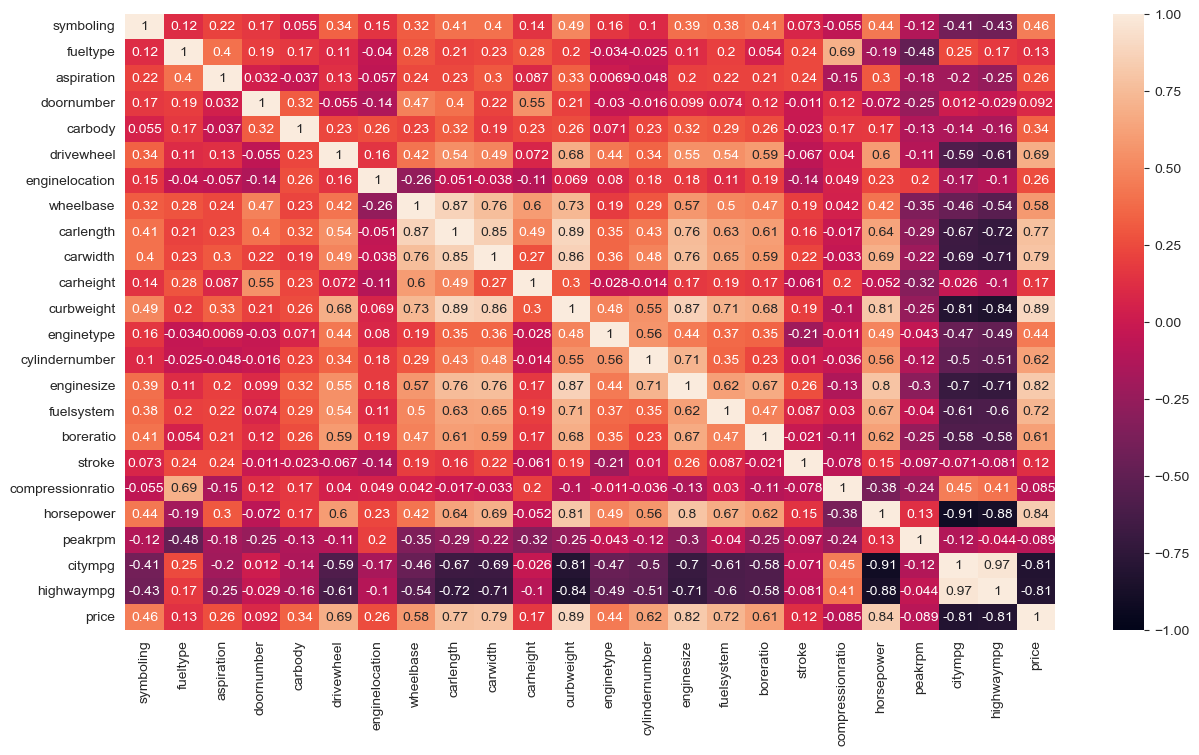

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(d.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [37]:
X.drop(columns='citympg',inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns).sort_values(ascending=False)

curbweight          23.912662
horsepower          20.979950
cylindernumber      14.757704
enginesize          13.721791
carlength           11.775708
highwaympg           9.283437
fueltype             8.657697
wheelbase            7.496222
compressionratio     7.025214
fuelsystem           6.631710
carwidth             6.370998
drivewheel           4.820847
doornumber           4.648846
aspiration           4.111155
carbody              3.949533
symboling            3.398623
boreratio            2.718415
enginetype           2.708271
carheight            2.698129
peakrpm              2.685986
enginelocation       1.858415
stroke               1.728404
dtype: float64

In [38]:
X.drop(columns='curbweight',inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns).sort_values(ascending=False)

horsepower          20.649101
cylindernumber      12.892531
enginesize          11.398032
carlength           10.388098
fueltype             8.145718
highwaympg           7.644592
wheelbase            7.454332
compressionratio     7.018314
fuelsystem           6.625665
carwidth             6.152820
doornumber           4.524054
drivewheel           4.149815
aspiration           4.110858
carbody              3.807320
symboling            3.379465
boreratio            2.692589
peakrpm              2.671634
carheight            2.662903
enginetype           2.643433
enginelocation       1.856619
stroke               1.728401
dtype: float64

In [39]:
X.drop(columns='horsepower',inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns).sort_values(ascending=False)

cylindernumber      11.080906
carlength           10.377102
wheelbase            7.418782
compressionratio     6.616362
highwaympg           6.220325
fueltype             6.136213
carwidth             6.108258
fuelsystem           5.669268
enginesize           5.450592
doornumber           4.508550
drivewheel           4.094049
carbody              3.801227
symboling            3.323863
aspiration           2.776716
boreratio            2.692067
enginetype           2.560783
carheight            2.432071
peakrpm              2.069249
enginelocation       1.810618
stroke               1.725261
dtype: float64

In [40]:
X.drop(columns='cylindernumber',inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns).sort_values(ascending=False)

carlength           10.303974
wheelbase            7.351872
highwaympg           6.084285
carwidth             6.049176
fueltype             5.854486
enginesize           5.430186
compressionratio     5.312289
fuelsystem           5.250273
doornumber           4.171684
drivewheel           3.716180
carbody              3.470955
symboling            3.216456
aspiration           2.699579
carheight            2.426168
boreratio            2.425413
enginetype           2.198452
peakrpm              2.062853
enginelocation       1.809656
stroke               1.725080
dtype: float64

In [41]:
X.drop(columns='carlength',inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns).sort_values(ascending=False)

wheelbase           6.031306
fueltype            5.853145
carwidth            5.559409
highwaympg          5.549293
compressionratio    5.255458
fuelsystem          5.217589
enginesize          5.152818
doornumber          3.977733
drivewheel          3.711422
carbody             3.433285
symboling           3.216297
aspiration          2.696489
boreratio           2.418018
carheight           2.335879
enginetype          2.198260
peakrpm             2.062381
enginelocation      1.809457
stroke              1.725059
dtype: float64

In [42]:
model=OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              167.8
Date:                Tue, 15 Aug 2023   Prob (F-statistic):                   5.04e-105
Time:                        21:51:23   Log-Likelihood:                         -164.43
No. Observations:                 205   AIC:                                      364.9
Df Residuals:                     187   BIC:                                      424.7
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.1070      0.028      3.820      0.000       0.052       0.162
fueltype             1.0992      0.306      3.596      0.000       0.496       1.702
aspiration          -0.3316      0.153     -2.174      0.031      -0.633      -0.031
doornumber           0.4257      0.105      4.051      0.000       0.218       0.633
carbody              0.1797      0.043      4.173      0.000       0.095       0.265
drivewheel           0.3194      0.062      5.192      0.000       0.198       0.441
enginelocation       0.0324      0.439      0.074      0.941      -0.833       0.898
wheelbase           -0.2584      0.103     -2.521      0.013      -0.461      -0.056
carwidth             0.1228      0.097      1.265      0.207      -0.069       0.314
carheight            0.0047      0.060      0.078      0.938      -0.114       0.124
enginetype           0.1238      0.031      3.978      0.000       0.062       0.185
enginesize          -0.5022      0.103     -4.862      0.000      -0.706      -0.298
fuelsystem           0.0963      0.017      5.509      0.000       0.062       0.131
boreratio           -0.0818      0.061     -1.333      0.184      -0.203       0.039
stroke               0.1032      0.053      1.958      0.052      -0.001       0.207
compressionratio    -1.1998      0.142     -8.469      0.000      -1.479      -0.920
peakrpm             -0.0438      0.057     -0.772      0.441      -0.156       0.068
highwaympg           0.3121      0.094      3.314      0.001       0.126       0.498
==============================================================================
Omnibus:                        1.248   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.931
Skew:                          -0.139   Prob(JB):                        0.628
Kurtosis:                       3.177   Cond. No.                         66.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
bekar=model.pvalues[model.pvalues>0.05]
bekar.index

Index(['enginelocation', 'carwidth', 'carheight', 'boreratio', 'stroke',
       'peakrpm'],
      dtype='object')

In [44]:
X.drop(columns=[i for i in bekar.index],inplace=True)

In [45]:
model=OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              247.9
Date:                Tue, 15 Aug 2023   Prob (F-statistic):                   3.22e-110
Time:                        21:51:23   Log-Likelihood:                         -168.95
No. Observations:                 205   AIC:                                      361.9
Df Residuals:                     193   BIC:                                      401.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.1041      0.028      3.768      0.000       0.050       0.159
fueltype             1.4554      0.264      5.512      0.000       0.935       1.976
aspiration          -0.3846      0.150     -2.559      0.011      -0.681      -0.088
doornumber           0.4144      0.102      4.056      0.000       0.213       0.616
carbody              0.1652      0.042      3.946      0.000       0.083       0.248
drivewheel           0.2722      0.057      4.754      0.000       0.159       0.385
wheelbase           -0.2063      0.070     -2.935      0.004      -0.345      -0.068
enginetype           0.1094      0.030      3.693      0.000       0.051       0.168
enginesize          -0.4382      0.075     -5.819      0.000      -0.587      -0.290
fuelsystem           0.1011      0.016      6.143      0.000       0.069       0.134
compressionratio    -1.3137      0.127    -10.380      0.000      -1.563      -1.064
highwaympg           0.2981      0.086      3.450      0.001       0.128       0.469
==============================================================================
Omnibus:                        3.764   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.421
Skew:                          -0.244   Prob(JB):                        0.181
Kurtosis:                       3.403   Cond. No.                         45.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.05,random_state=10)

In [47]:
main_model=lr.fit(xtrain,ytrain)

In [48]:
# Training and Testing Error
pred_train=np.exp(np.exp(main_model.predict(xtrain)))
pred_test=np.exp(np.exp(main_model.predict(xtest)))

In [55]:
# Lets Check Performance of the Model.
df=pd.DataFrame()
df.loc['Train:','R2 Score']=round(r2_score(np.exp(np.exp(ytrain)),pred_train),2)
df.loc['Test:','R2 Score']=round(r2_score(np.exp(np.exp(ytest)),pred_test),2)
df.loc['Train:','RMSE Score']=round(np.sqrt(mean_squared_error(np.exp(np.exp(ytrain)),pred_train)),2)
df.loc['Test:','RMSE Score']=round(np.sqrt(mean_squared_error(np.exp(np.exp(ytest)),pred_test)),2)
df

,R2 Score,RMSE Score
Train:,0.81,3508.12
Test:,0.95,1741.41
